In [1]:
from estnltk import Text

from estnltk.taggers import DateTagger
from pandas import read_csv
from estnltk.taggers import RegexTagger

from estnltk.spans import Span, SpanList
from estnltk.layer import Layer

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
datetagger = DateTagger()
datetagger

In [5]:
vocabulary = 'regexes.csv'

In [6]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [7]:
vocabulary

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value,grammar_symbol
0,((K|k)olesteroo?l|KOLESTEROOL|(K|k)olester|Chol|(K|k)olest?|kol|chol|CHol|CHL|KOL|Kol|cHOL|CHOL|ÜK|ük|Ük),0,1,,measurement_object,kolesterool,MO
1,((mmoo?l?i?|mm|MMOL|mol)(\s*[-/]\s*(L|l))?|MMOL/L),0,1,,unit,chol_unit,UNIT
2,"([0-9])+(\s?[,.]\s?[0-9]+)?",0,1,,number,whatever,NUMBER
3,"(psa|Psa|S-PSA|[Pp]rostataspetsiifiline\s*antigeen(\s*seerumis)?|PSA|(S\s*,\s*P-)?(\s*PSA))",0,1,,measurement_object,psa,MO
4,(ng/mL|ng/L|mk(ro)?g/[Ll]|ng/\s*ml|ng7ml|mg/ml|ng\\ml|ng/l|ug/L|ngIml|µg/L|mcg/L|ng/mg),0,1,,unit,psa_unit,UNIT
5,(a[. ]|aasta|kuu|nädal|[Xx]|kord|min|msek|ms|),0,2,,unit,time_unit,UNIT
6,(((S|s)iinus)?r.tm(iline|ilised)?|[Ff]rekv?(ents)?|fr\.?|Fr|BPM|bpm|SR|SLS|FR|HR|(P|p)ulss(i)?|Ps)(\s*[xX]\s*)?,0,1,,measurement_object,pulss,MO
7,(([12][0-9]{2})|([3-9][0-9])),0,1,,number,some_int,NUMBER
8,(((l|x|X|lööki))\s*/?\s*(1\s*)?min(utis)?)|/min|x['´`]|bpm|BPM,0,1,,unit,pulss_unit,UNIT
9,((([Ss]ünni)|([Kk]eha))?(p|P)ikkus|PIKKUS|pikkusega|[^A-Z]SP|sp|pikk|kasv|Kasv),0,1,,measurement_object,pikkus,MO


In [8]:
test_regex_tagger = RegexTagger(vocabulary=vocabulary[:17],
                                        attributes=['regex_type', 'value', 'grammar_symbol'],
                                        conflict_resolving_strategy='MAX',
                                        overlapped=False,
                                        layer_name='type')

In [9]:
spaces = vocabulary[17:22]

In [10]:
spaces

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value,grammar_symbol
17,[-=.>< ]*,0,1,,space,space,SPACE
18,\.?\s*-?\s*,0,1,,space,space,SPACE
19,[-=.>< ]*(on|oli)\s*,0,1,,space,space,SPACE
20,\s*-?:?\s*\<?,0,1,,space,space,SPACE
21,\s*,0,1,,space,space,SPACE


In [11]:
space_tagger = RegexTagger(vocabulary = spaces,
                        attributes = ['normalized'],
                        conflict_resolving_strategy='MAX',
                        overlapped=False,
                        layer_name='space'
                         )

In [12]:
def tag_random_text(tagged_line):
    '''
    Tags everything that has not been tagged yet as random_text_layer
    '''
    other = []
    for i in tagged_line.space:
        space_range = list(range(i.start, i.end))
        other += space_range

    for i in tagged_line.type:
        type_range = list(range(i.start, i.end))
        other += type_range
    for i in tagged_line.dates:
        date_range = list(range(i.start, i.end))
        other += date_range
        
    text = ''
    text_started = False
    text_ranges = []
    text_texts = []
    for idx, i in enumerate(tagged_line.text):
        if idx not in other:
            text += i
            if text_started == False:
                text_start = idx
                text_started = True

        else:
            text_end = idx
            text_started = False  
            if text_started == False:
                if len(text) > 0:
                    text_ranges.append((text_start, text_end))
                    text_texts.append(text)   
                    text = ''
                    
    layer = Layer(name = 'random_text_layer', attributes = ['no_idea', 'grammar_symbol'])
    for span in text_ranges:
        sp = Span(start = span[0], end = span[1])
        sp.no_idea = 'text'
        sp.grammar_symbol = 'RANDOM_TEXT'
        layer.add_span(sp)
    test_thing = tagged_line    
    test_thing['random_text_layer'] = layer
    
    return test_thing

from estnltk.taggers.gaps_tagging.gaps_tagger import GapsTagger
gaps_tagger = GapsTagger(layer_name='random_text_layer',
                         input_layers=['space', 'type', 'dates'],
                         attributes=['no_idea', 'grammar_symbol'],
                         decorator=lambda t: {'no_idea':'text', 'grammar_symbol':'RANDOM_TEXT'})

In [13]:
def change_date_layer(line_with_dates):
    layer = Layer(name='dates2', parent='dates', attributes=('grammar_symbol',))
    for s in line_with_dates.dates:
        s.grammar_symbol = 'DATE'
        layer.add_span(s)
    #del line_with_dates['dates']    
    line_with_dates['dates2'] = layer    
    return line_with_dates

In [14]:
tagged_lines = []
lines_to_texts = {}
for line in lines:
    print(line)
    text = Text(line)
    test_regex_tagger.tag(text)
    datetagger.tag(text)
    space_tagger.tag(text)
    gaps_tagger.tag(text)
    #t = tag_random_text(text)
    t = change_date_layer(text)
    tagged_lines.append(t)
    lines_to_texts[line] = t

PSA 03042012 - 0,83ng/ml perearsti poolt .
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
PSA 20105,99 ja 26.01.2012 uuesti .
PSA 2011 oli 0 , 4 nG7ml .
PSA 201222,25ng/ml
PSA 2 aastajooksuldünaamikata , eriuuring
:psa 16,81! ! ! ! ! ,
Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )
loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a
Kolesterool 1k aastas .
Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni
Kontr Verekol 08.12a Per-le juurde .
s vas munajuha kasvaja op , günekol 3a tagssi .
08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .
Rütmihäire tsüklipikkus 330 msek
Loote pikkus :   3 mm - vastab  5 nädalat 6 päeva.
Põhjendus: PALAT 10 # ALAT maksanäitaja
ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .
PSA 8,5( püsib aastaid selles väärtus
S , P-PSA 4.130( <4.100 µg/L )
PSA 5,2.
Kolesterool oli 7,9 mmol/l 0
kolesterool 6.4.
Kolesterool 5,2 mmol/l - esialgu dieet .
SK 3900 g , SP 51 cm .
Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .
Kehakaal 80,2 kg , KMI 25,9
S , P-NT-proBNP 668 ( <125 p

In [15]:
for line in tagged_lines:
    print(line.text)
    print(line.dates2)
    print(line.regex_type)
    print(line.random_text_layer)
    print('--------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
SL[Span(2012, {'grammar_symbol': 'DATE'})]
['measurement_object', 'number', 'number', 'unit']
SL[Span(perearsti, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(poolt, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'})]
--------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
SL[Span(10. 3, {'grammar_symbol': 'DATE'}),
Span(12. 1, {'grammar_symbol': 'DATE'})]
['measurement_object', 'number', 'unit', 'measurement_object', 'number', 'number', 'unit', 'unit']
SL[Span(,, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(,, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(B, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(va, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'})]
--------------
PSA 20105,99 ja 26.01.2012 uuesti .
SL[Span(2010, {'grammar_symbol': 'DATE'}),
Span(26.01.2012, {'grammar_symbol': 'DATE'})]
['measurement_object', 'number', 'unit', 'number', 'number']
SL[Span(j, {'no_id

# GRAMMAR

(MO = measurement_object)<br>
QNUMBER = NUMBER_UNIT<br>
QNUMBER = NUMBER<br>
MEASUREMENT = MO_DATE_QNUMBER<br>
MEASUREMENT = MO_QNUMBER<br>
TRASH = RUBBISH_NUMBER<br>
TRASH = RUBBISH_MO_NUMBER<br>
TRASH = RUBBISH<br>
TRASH = MO_DATE

In [16]:
from estnltk.finite_grammar.trees import Rule, Grammar


def decorator(nodes):
    return {}


def checker(nodes):
    return True


def qnumber_decorator(nodes):
    number, unit = nodes
    unit_type = unit.value
    return {'value': float(number.text.replace(',', '.').replace(' ', '')),
            'unit': unit.text,
            'unit_type': unit_type,
            'mtype': 'continuous'}


def measurement_decorator(nodes):
    return {'date': nodes[1].date_text}


def measurement_checker(nodes):
    mo, qnumber = nodes[0], nodes[1]
    units = {'psa':'psa_unit',
             'kolesterool':'chol:unit',
             'pulss':'pulss_unit',
             'pikkus':'pikkus_unit',
             'kaal':'kaal_unit',
             'alat':'alat_unit'
            }
    if hasattr(qnumber, 'unit_type'):
        return units[mo.value] == qnumber.unit_type
    return True


rules = []      
rules.append(Rule('QNUMBER', 'NUMBER UNIT', 0, qnumber_decorator, checker))
rules.append(Rule('QNUMBER', 'NUMBER', 1, decorator, checker))
rules.append(Rule('MEASUREMENT', 'MO DATE QNUMBER', 0, measurement_decorator, measurement_checker))
rules.append(Rule('MEASUREMENT', 'MO QNUMBER', 0, decorator, measurement_checker))
rules.append(Rule('TRASH', 'RUBBISH NUMBER', 0, decorator, checker))
rules.append(Rule('TRASH', 'RUBBISH MO NUMBER', 0, decorator, checker))
rules.append(Rule('TRASH', 'RUBBISH', 0, decorator, checker))
rules.append(Rule('TRASH', 'MO DATE', 0, decorator, checker))

grammar = Grammar(start_symbols=['MEASUREMENT', 'TRASH'], rules=rules)
grammar


Grammar:
	start: MEASUREMENT, TRASH
	terminals: DATE, MO, NUMBER, RUBBISH, UNIT
	nonterminals: MEASUREMENT, QNUMBER, TRASH
Rules:
	QNUMBER -> NUMBER UNIT	: 0, cc: checker, dec: qnumber_decorator
	QNUMBER -> NUMBER	: 1, cc: checker, dec: decorator
	MEASUREMENT -> MO DATE QNUMBER	: 0, cc: measurement_checker, dec: measurement_decorator
	MEASUREMENT -> MO QNUMBER	: 0, cc: measurement_checker, dec: decorator
	TRASH -> RUBBISH NUMBER	: 0, cc: checker, dec: decorator
	TRASH -> RUBBISH MO NUMBER	: 0, cc: checker, dec: decorator
	TRASH -> RUBBISH	: 0, cc: checker, dec: decorator
	TRASH -> MO DATE	: 0, cc: checker, dec: decorator

In [17]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, depth=3):
    print(phrase)

['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'MO', 'DATE']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'MO', 'DATE']


PSA 20105,99 ja 26.01.2012 uuesti .


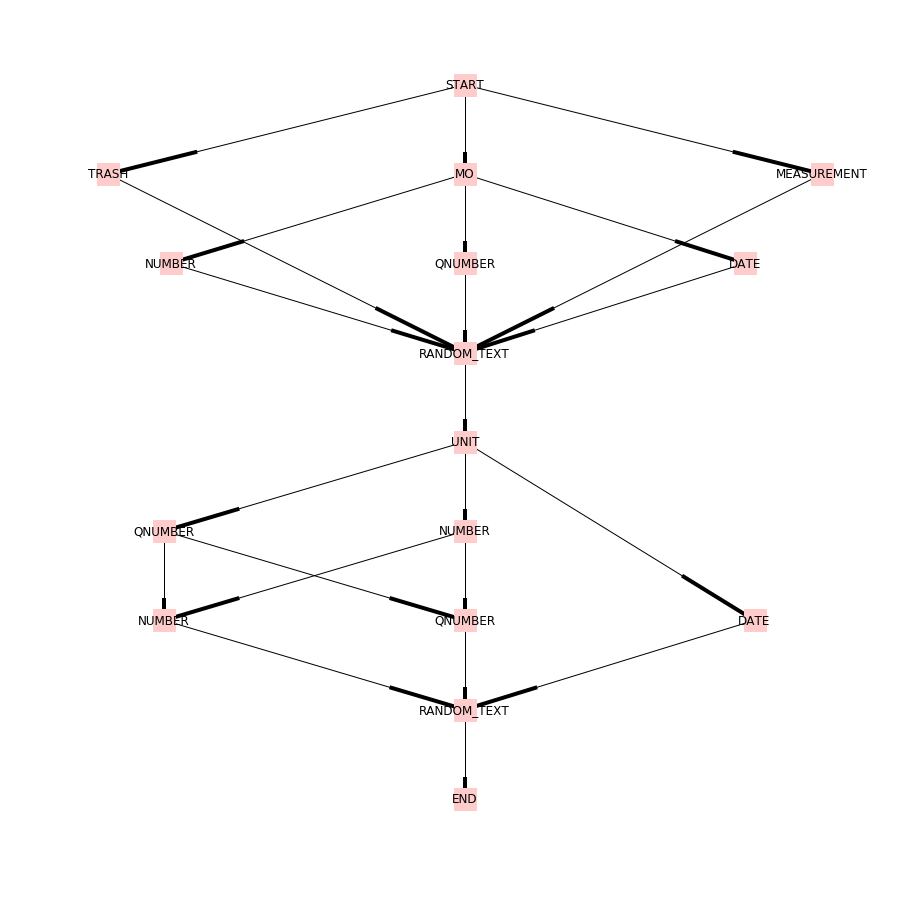

In [18]:
from estnltk.layer_operations.consecutive import iterate_consecutive_spans
from estnltk.finite_grammar.trees import START_SPAN, END_SPAN, Node, parse_graph, plot_graph, LayerGraph


def parse_text(text):
    graph = LayerGraph()
    spans = list(text.type) + list(text.dates) + list(text.random_text_layer) + [START_SPAN, END_SPAN]
    for a, b in iterate_consecutive_spans(spans):
        graph.add_edge( Node(support=a), Node(support=b))

    graph = parse_graph(graph, grammar, 4)
    return graph

text = tagged_lines[2]
print(text.text)
graph = parse_text(text)
plot_graph(graph)

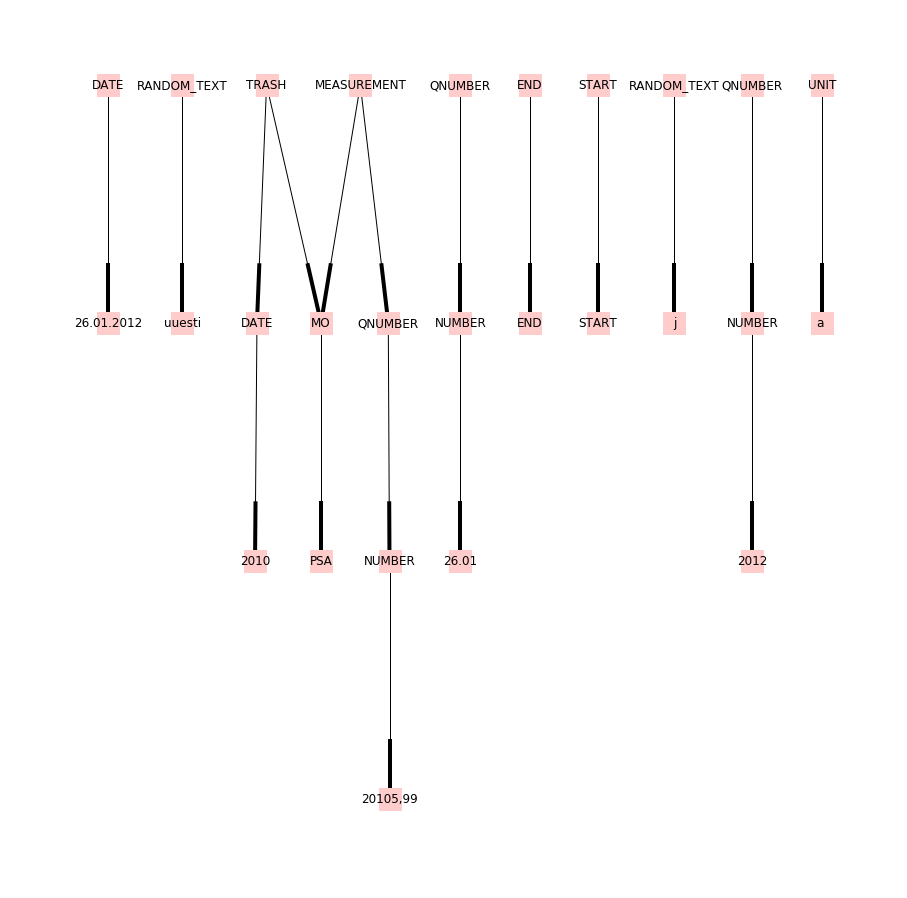

In [19]:
import networkx as nx

class SpanNode:
    """ Represents a text span as a node of a nx.DiGraph.
        Used to add parsed text spans to the graph.
    """
    def __init__(self, span):
        self.name = span.text
        self.start = span.start
        self.end = span.end

    def __hash__(self):
        return hash((self.name, self.start, self.end))


def graph_to_parse_trees(graph):
    parse_trees = nx.DiGraph()
    for node in graph.nodes():
        parse_trees.add_node(node)
        if isinstance(node.support, Span):
            sn = SpanNode(node.support) 
            parse_trees.add_edge(node, sn)
        else:
            for supp in node.support:
                parse_trees.add_edge(node, supp)
    return parse_trees

parse_trees = graph_to_parse_trees(graph)
plot_graph(parse_trees)

In [20]:
import ipywidgets as widgets


text_selection = widgets.Dropdown(
    options=lines,
    description='Text:',
)

def observe(change):
    out.clear_output()
    with out:
        line = change['new']
        graph = parse_text(lines_to_texts[line])
        print(lines_to_texts[line].text)
        plot_graph(graph)

text_selection.observe(observe, names='value')

out = widgets.Output()

display(text_selection, out)

Dropdown(description='Text:', options=('PSA 03042012 - 0,83ng/ml perearsti poolt .', 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va', 'PSA 20105,99 ja 26.01.2012 uuesti .', 'PSA 2011 oli 0 , 4 nG7ml .', 'PSA 201222,25ng/ml', 'PSA 2 aastajooksuldünaamikata , eriuuring', ':psa 16,81! ! ! ! ! ,', 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )', 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a', 'Kolesterool 1k aastas .', 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni', 'Kontr Verekol 08.12a Per-le juurde .', 's vas munajuha kasvaja op , günekol 3a tagssi .', '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .', 'Rütmihäire tsüklipikkus 330 msek', 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.', 'Põhjendus: PALAT 10 # ALAT maksanäitaja', 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .', 'PSA 8,5( püsib aastaid selles väärtus', 'S , P-PSA 4.130( <4.100 µg/L )', 'PSA 5,2.', 'Kolesterool oli 7,9 mmol/l 0', 'kolesterool 6.4.', 'Kolesterool 5,2 mmol/l - esialgu dieet .', 'SK 3900 g , SP 51 cm .', 'Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .', 'Kehakaal 80,2 kg , KMI 25,9', 'S , P-NT-proBNP 668 ( <125 pg/mL ) S , P-Albumiin 43 ( 35 .. 52 g/L ) S , P-ALAT 25 ( <33 U/L )', 'PSA 6,5 ng/ml, eesnäärme maht67cm3', 'rjeldus : Siinusbradükardia Fr 587min'), value='PSA 03042012 - 0,83ng/ml perearsti poolt .')

Output()

In [21]:
for node in graph:
    print(node)

Node(END, (inf, inf), 5312320395355746976)
Node(RANDOM_TEXT, (27, 33), 7386046568122527235)
Node(NUMBER, (16, 21), -6017116672299213241)
Node(TRASH, (0, 8), -5421708648583474072)
Node(QNUMBER, (22, 26), 7733954443793932780)
Node(START, (-inf, -inf), -1161948875569626228)
Node(NUMBER, (4, 12), -6091359178622482960)
Node(QNUMBER, (4, 12), 2838937101644913364)
Node(RANDOM_TEXT, (13, 14), -3295068679035142828)
Node(MEASUREMENT, (0, 12), 6706523923952615550)
Node(QNUMBER, (16, 21), 7944715670807329833)
Node(NUMBER, (22, 26), -3819444396798731112)
Node(MO, (0, 3), 4864827597513861433)
Node(DATE, (4, 8), -3530086207813107617)
Node(UNIT, (14, 16), -7040565702961238754)
Node(DATE, (16, 26), -3123306199616201953)
